In [1]:
from numpy import random   
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('/Users/jesshuang/Documents/GitHub/jess_window/machine_learning/world_happiness/World Happiness Report.csv')
data.head()

Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   Social Support  Healthy Life Expectancy At Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.850035   
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.731109   
4                      0.530935    0.237588                   0.775620   

   Positive Affect  Negative Affect  Confidence In National Government  
0         0.414297         0.258195                           0.612072  
1         0.481421         0.237092                           0.611545  
2         0.516907         0.275324                           0.299357  
3         0.479835         0.267175                           0.307386  
4         0.613513         0.267919                           0.435440

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2179 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2166 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2083 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

In [3]:
data.describe()

Year  Life Ladder  Log GDP Per Capita  Social Support  \
count  2199.000000  2199.000000         2179.000000     2186.000000   
mean   2014.161437     5.479226            9.389766        0.810679   
std       4.718736     1.125529            1.153387        0.120952   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2010.000000     4.646750            8.499764        0.746609   
50%    2014.000000     5.432437            9.498955        0.835535   
75%    2018.000000     6.309460           10.373216        0.904792   
max    2022.000000     8.018934           11.663788        0.987343   

       Healthy Life Expectancy At Birth  Freedom To Make Life Choices  \
count                       2145.000000                   2166.000000   
mean                          63.294583                      0.747858   
std                            6.901104                      0.140150   
min                            6.720000                      0.257534   
25%                           59.119999                      0.656528   
50%                           65.050003                      0.769821   
75%                           68.500000                      0.859382   
max                           74.474998                      0.985178   

        Generosity  Perceptions Of Corruption  Positive Affect  \
count  2126.000000                2083.000000      2175.000000   
mean      0.000096                   0.745195         0.652143   
std       0.161083                   0.185837         0.105922   
min      -0.337527                   0.035198         0.178886   
25%      -0.112116                   0.688139         0.571684   
50%      -0.022671                   0.799654         0.663063   
75%       0.092070                   0.868827         0.737936   
max       0.702708                   0.983276         0.883586   

       Negative Affect  Confidence In National Government  
count      2183.000000                        1838.000000  
mean          0.271501                           0.483999  
std           0.086875                           0.193071  
min           0.082737                           0.068769  
25%           0.207660                           0.332549  
50%           0.260671                           0.467140  
75%           0.322894                           0.618846  
max           0.704590                           0.993604

In [36]:
condition = data.isnull().any(axis='columns')
data[condition]

Country Name            Regional Indicator  Year  Life Ladder  \
13    Afghanistan                    South Asia  2022     1.281271   
15        Albania    Central and Eastern Europe  2009     5.485470   
16        Albania    Central and Eastern Europe  2010     5.268937   
17        Albania    Central and Eastern Europe  2011     5.867422   
28        Albania    Central and Eastern Europe  2022     5.212213   
...           ...                           ...   ...          ...   
2155        Yemen  Middle East and North Africa  2007     4.477133   
2163        Yemen  Middle East and North Africa  2016     3.825631   
2164        Yemen  Middle East and North Africa  2017     3.253560   
2166        Yemen  Middle East and North Africa  2019     4.196913   
2198     Zimbabwe            Sub-Saharan Africa  2022     3.296220   

      Log GDP Per Capita  Social Support  Healthy Life Expectancy At Birth  \
13                   NaN        0.228217                         54.875000   
15              9.241429        0.833047                         67.320000   
16              9.282793        0.733152                         67.599998   
17              9.310619        0.759434                         67.879997   
28              9.626483        0.724090                         69.175003   
...                  ...             ...                               ...   
2155            8.211859        0.824969                         58.720001   
2163            7.552322        0.775407                         58.174999   
2164            7.243477        0.789555                         57.950001   
2166            7.447973        0.870043                         57.500000   
2198            7.670123        0.666172                         54.525002   

      Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
13                        0.368377         NaN                   0.733198   
15                        0.525223   -0.159259                   0.863665   
16                        0.568958   -0.173675                   0.726262   
17                        0.487496   -0.206186                   0.877003   
28                        0.802250   -0.065987                   0.845502   
...                            ...         ...                        ...   
2155                      0.672685    0.009045                        NaN   
2163                      0.532964   -0.140766                        NaN   
2164                      0.595191   -0.124107                        NaN   
2166                      0.651308   -0.102915                   0.798228   
2198                      0.651987   -0.069513                   0.752632   

      Positive Affect  Negative Affect  Confidence In National Government  
13           0.205868         0.575512                                NaN  
15           0.564474         0.279257                                NaN  
16           0.576077         0.300060                                NaN  
17           0.565759         0.256577                                NaN  
28           0.547126         0.254826                                NaN  
...               ...              ...                                ...  
2155         0.523652         0.378784                           0.465138  
2163         0.401007         0.227925                           0.267581  
2164         0.368106         0.295064                           0.247787  
2166         0.481123         0.213043                                NaN  
2198         0.640609         0.191350                                NaN  

[516 rows x 13 columns]

In [34]:
data

Country Name  Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0     Afghanistan          South Asia  2008     3.723590            7.350416   
1     Afghanistan          South Asia  2009     4.401778            7.508646   
2     Afghanistan          South Asia  2010     4.758381            7.613900   
3     Afghanistan          South Asia  2011     3.831719            7.581259   
4     Afghanistan          South Asia  2012     3.782938            7.660506   
...           ...                 ...   ...          ...                 ...   
2194     Zimbabwe  Sub-Saharan Africa  2018     3.616480            7.783066   
2195     Zimbabwe  Sub-Saharan Africa  2019     2.693523            7.697755   
2196     Zimbabwe  Sub-Saharan Africa  2020     3.159802            7.596050   
2197     Zimbabwe  Sub-Saharan Africa  2021     3.154578            7.656878   
2198     Zimbabwe  Sub-Saharan Africa  2022     3.296220            7.670123   

      Social Support  Healthy Life Expectancy At Birth  \
0           0.450662                         50.500000   
1           0.552308                         50.799999   
2           0.539075                         51.099998   
3           0.521104                         51.400002   
4           0.520637                         51.700001   
...              ...                               ...   
2194        0.775388                         52.625000   
2195        0.759162                         53.099998   
2196        0.717243                         53.575001   
2197        0.685151                         54.049999   
2198        0.666172                         54.525002   

      Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                         0.718114    0.167652                   0.881686   
1                         0.678896    0.190809                   0.850035   
2                         0.600127    0.121316                   0.706766   
3                         0.495901    0.163571                   0.731109   
4                         0.530935    0.237588                   0.775620   
...                            ...         ...                        ...   
2194                      0.762675   -0.051219                   0.844209   
2195                      0.631908   -0.047464                   0.830652   
2196                      0.643303    0.006313                   0.788523   
2197                      0.667636   -0.075575                   0.756945   
2198                      0.651987   -0.069513                   0.752632   

      Positive Affect  Negative Affect  Confidence In National Government  
0            0.414297         0.258195                           0.612072  
1            0.481421         0.237092                           0.611545  
2            0.516907         0.275324                           0.299357  
3            0.479835         0.267175                           0.307386  
4            0.613513         0.267919                           0.435440  
...               ...              ...                                ...  
2194         0.657524         0.211726                           0.550508  
2195         0.658434         0.235354                           0.456455  
2196         0.660658         0.345736                           0.577302  
2197         0.609917         0.241682                           0.665703  
2198         0.640609         0.191350                                NaN  

[2199 rows x 13 columns]

In [4]:
d = pd.DataFrame(data,columns=['Freedom To Make Life Choices'])
d.describe()

Freedom To Make Life Choices
count                   2166.000000
mean                       0.747858
std                        0.140150
min                        0.257534
25%                        0.656528
50%                        0.769821
75%                        0.859382
max                        0.985178

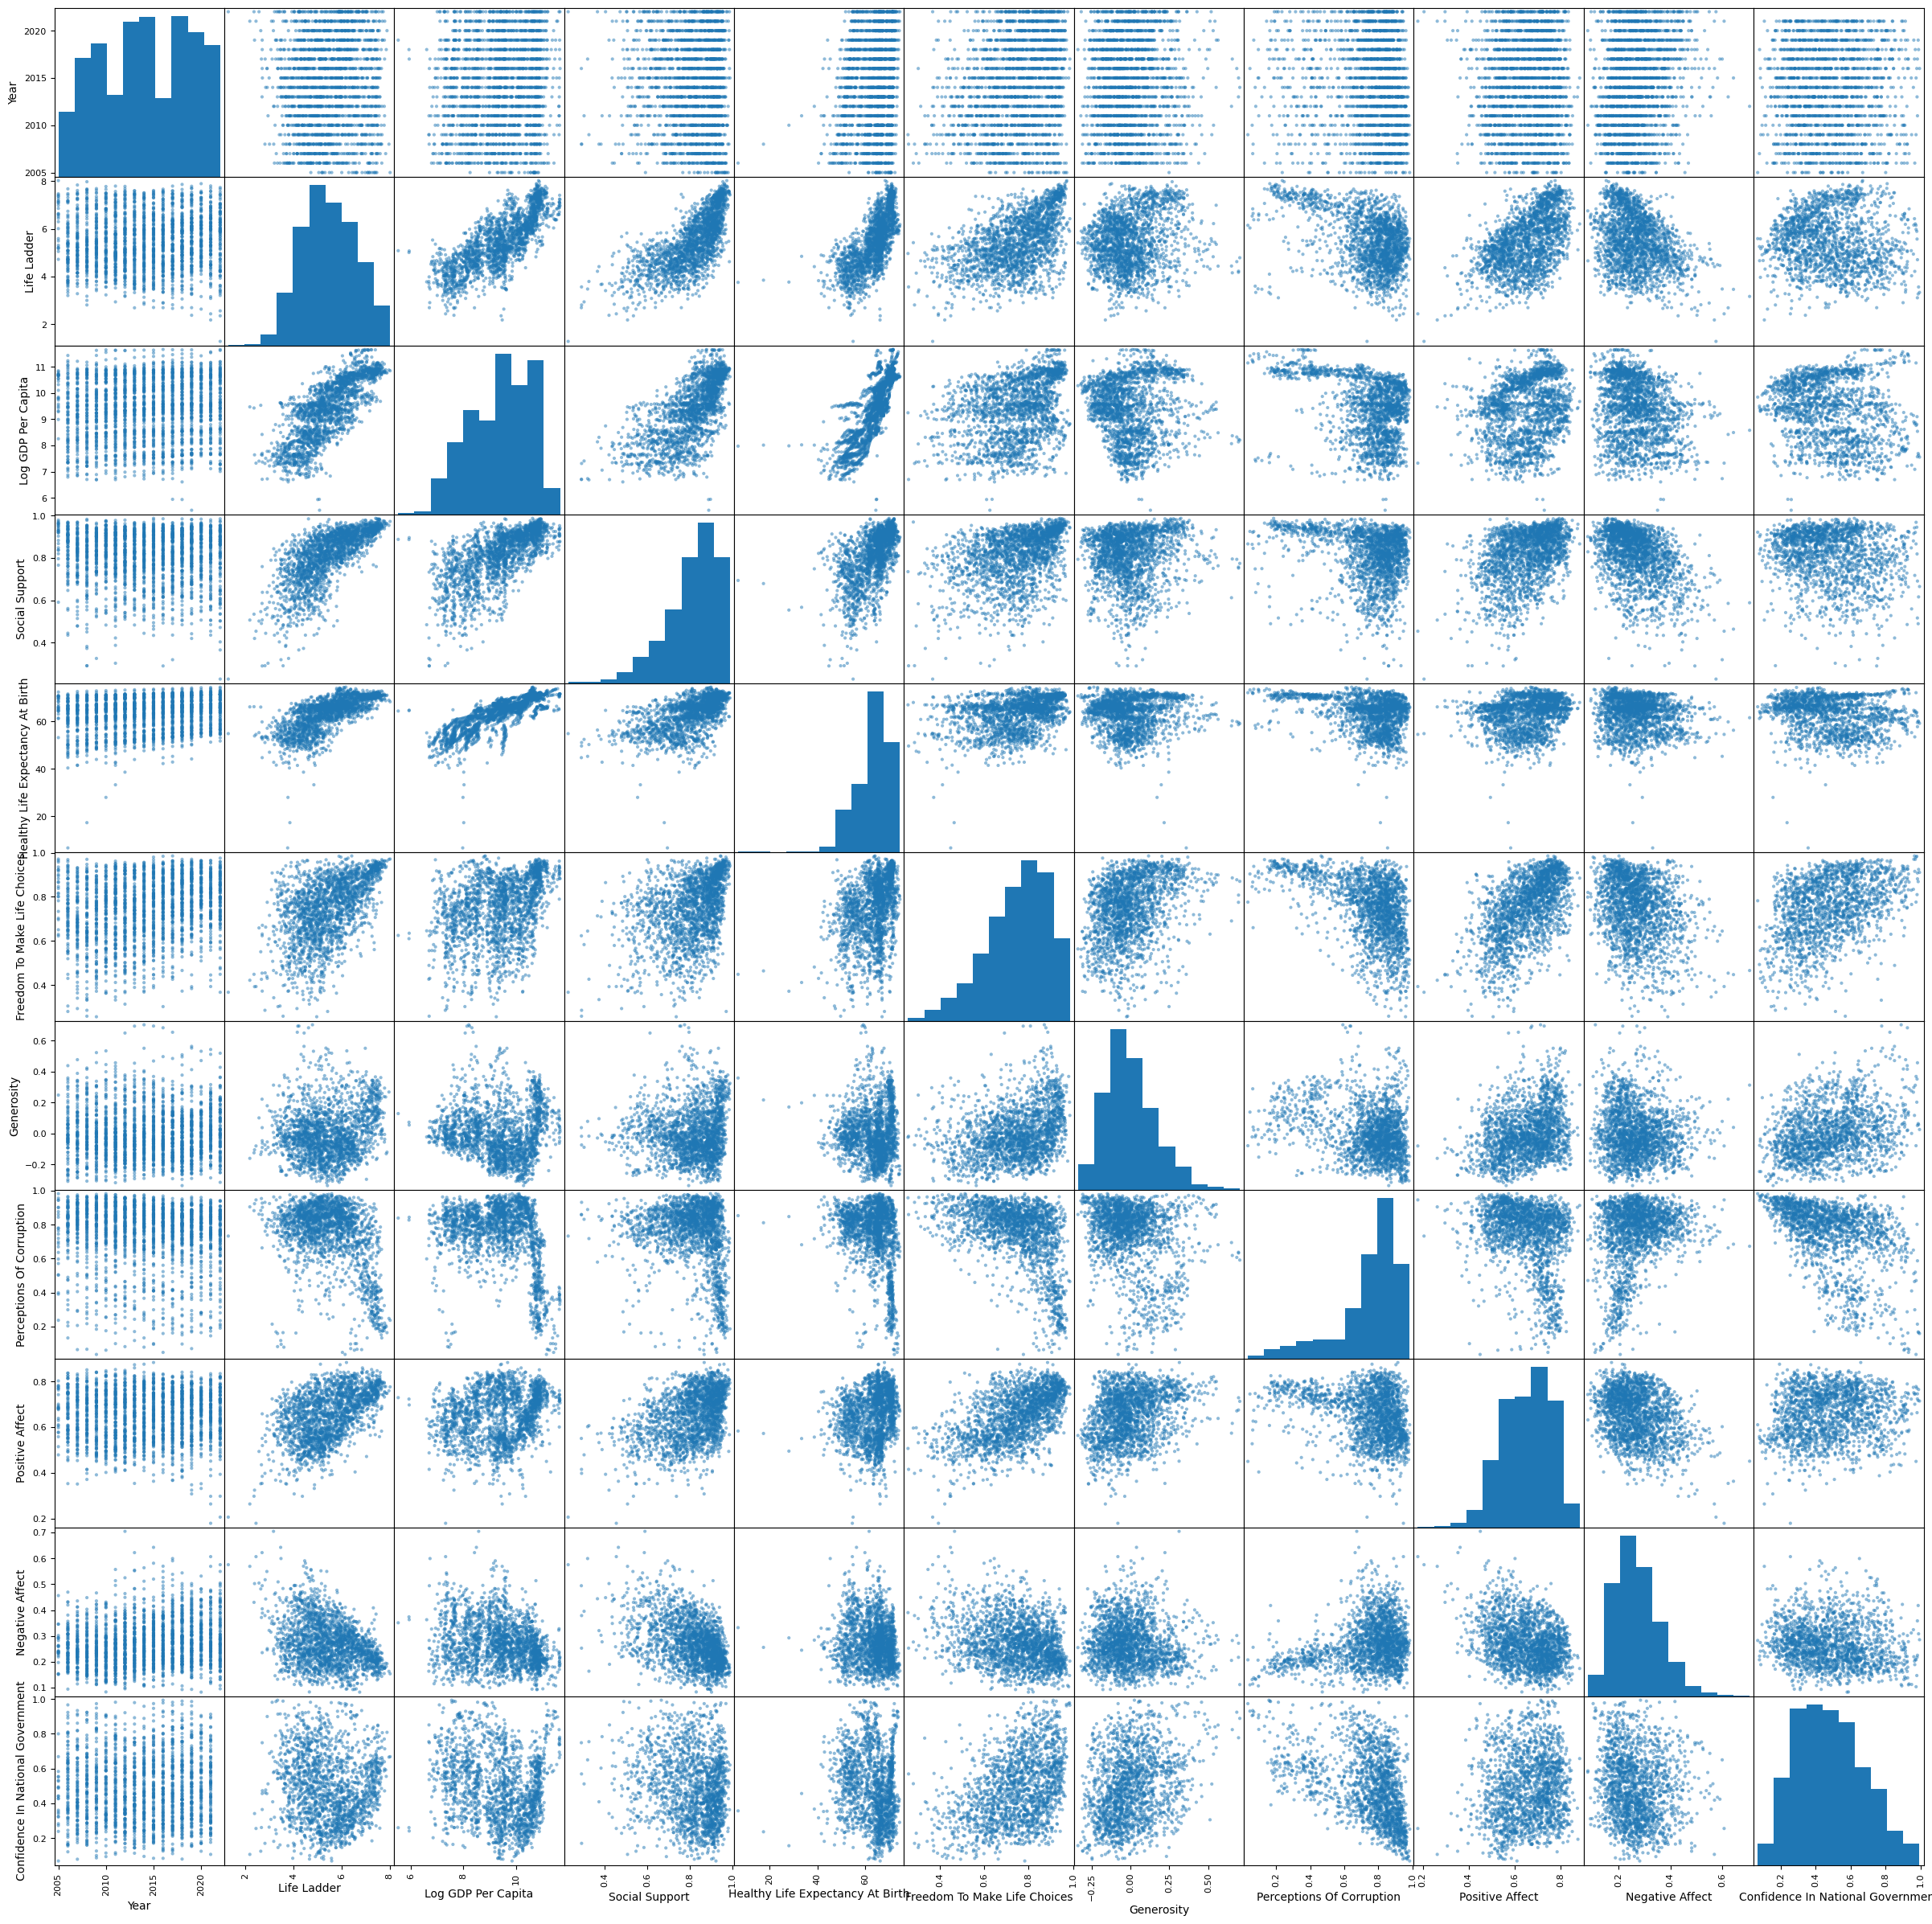

In [30]:
from pandas.plotting import scatter_matrix

_=scatter_matrix(data, figsize=(30,30))

In [11]:
Q1=data['Freedom To Make Life Choices'].quantile(0.25)
Q3=data['Freedom To Make Life Choices'].quantile(0.75)
IQR=Q3-Q1
Upper=Q3+1.5*IQR
Lower=Q1-1.5*IQR
print('Q3=',Q3,'Q1=',Q1,'IQR=',IQR,'Upper=',Upper,'Lower=',Lower)

Q3= 0.8593819142500001 Q1= 0.656528279 IQR= 0.2028536352500001 Upper= 1.1636623671250002 Lower= 0.35224782612499983


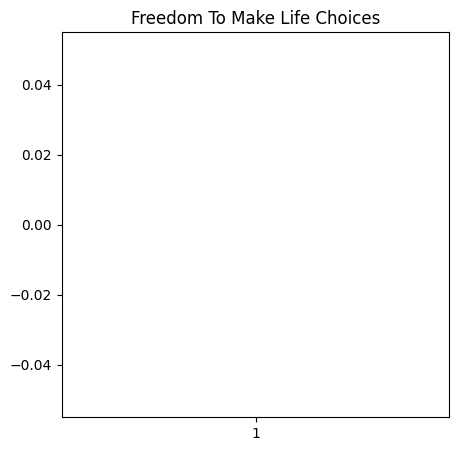

In [28]:
plt.figure(figsize=(5,5))
plt.boxplot(d,showmeans=True)
plt.title('Freedom To Make Life Choices')
plt.show()

/var/folders/z_/tp2bb4193xgdzr3fvyjyr6zm0000gn/T/ipykernel_80910/178111710.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


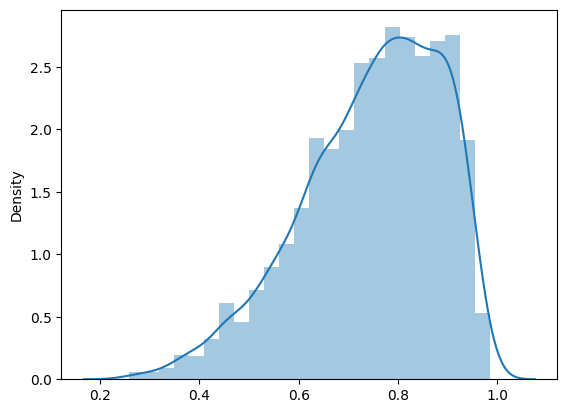

In [16]:
sns.distplot(d)
plt.show()

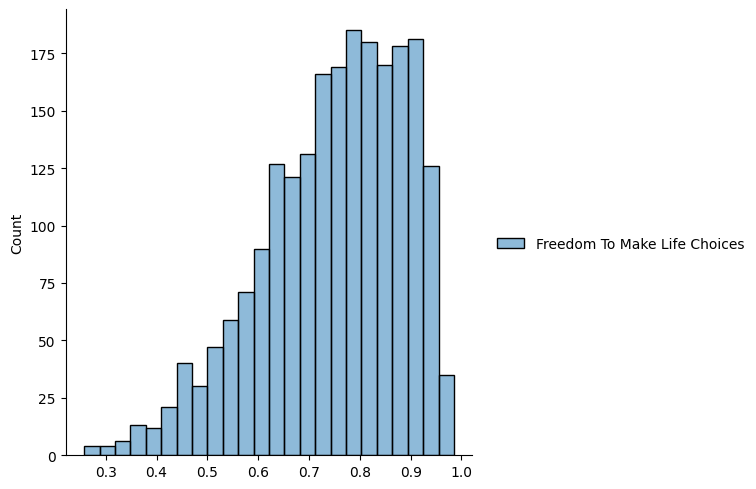

In [17]:
sns.displot(d)
plt.show()

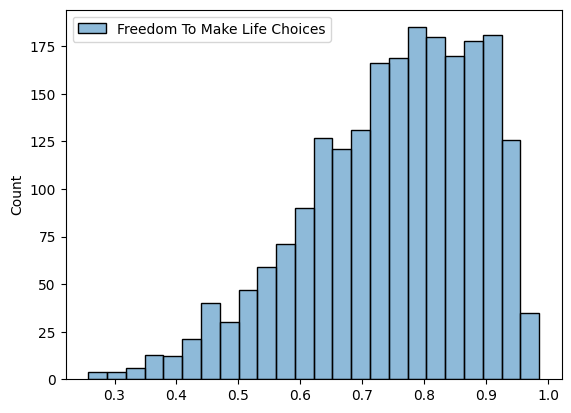

In [18]:
sns.histplot(d)
plt.show()

In [19]:
#skewness and kurtosis
print("偏態 Skewness: {:.2f}".format(d['Freedom To Make Life Choices'].skew()))
print("峰度 Kurtosis: {:.2f}".format(d['Freedom To Make Life Choices'].kurt()))

偏態 Skewness: -0.67
峰度 Kurtosis: -0.03


/var/folders/z_/tp2bb4193xgdzr3fvyjyr6zm0000gn/T/ipykernel_80910/1652594201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exp_data)


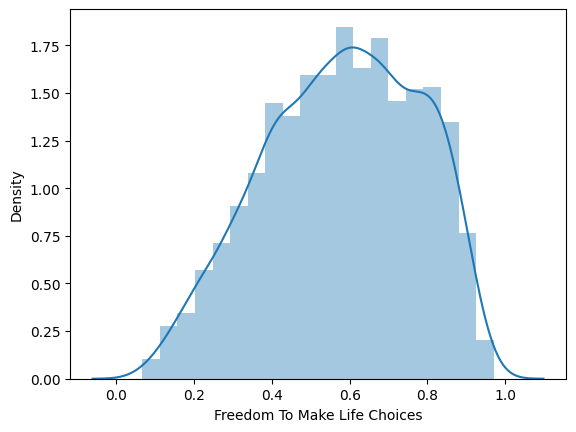

In [21]:
exp_data = np.power(d['Freedom To Make Life Choices'], 2)
exp_data = exp_data.replace([np.inf, -np.inf, -0], 0)
sns.distplot(exp_data)
plt.show()

In [18]:
%config InlineBackend. figure_format = 'retina'

<Axes: >

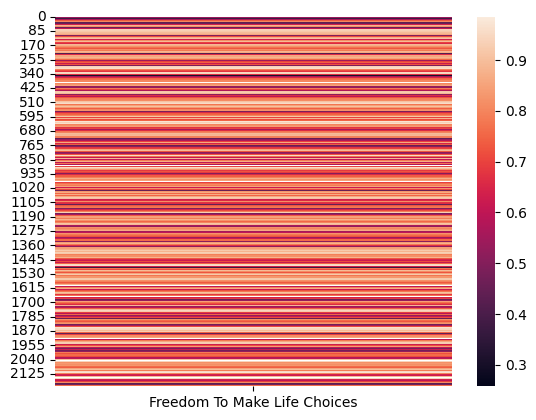

In [22]:
sns.heatmap(d)

<Axes: >

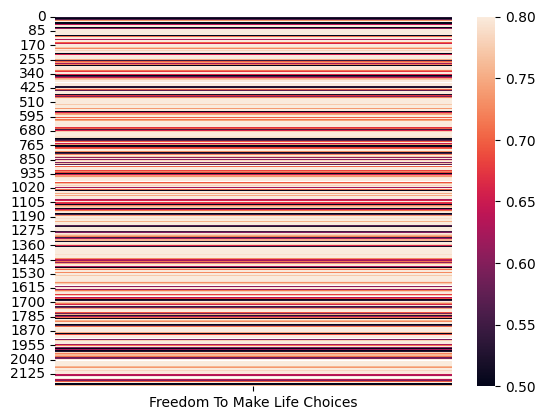

In [24]:
#設定顏色範圍 (vmin, vmax:設定顏色範圍)
sns.heatmap(d, vmin=0.5, vmax=0.8)

<Axes: >

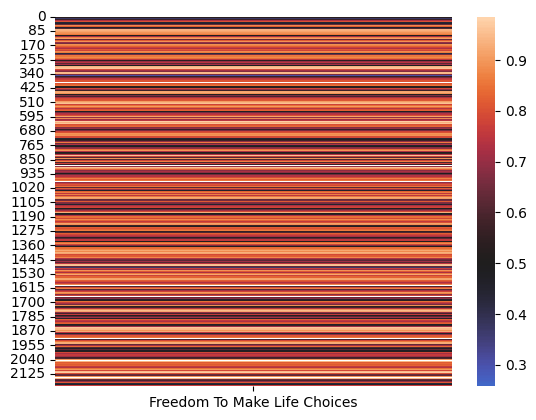

In [25]:
sns.heatmap(d, center=0.5)